In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [2]:
iomoves_df = pd.read_csv("Dataset Paper A 500 OI Moves 7 Apr 2020 A_v4.csv",encoding='latin1')

### The dataset imported in python

In [3]:
iomoves_df.head()

,Num of CS,Name of Company,Website,INPIRE Code,Country,Region,Sector,Manufacturing/Service,Size,Tech Intensity,...,Author,Interview date,Reviewer,OI Journey number,Relevant text in the case study,Innovating with,leading to,No in typology,Management score,Success score
0,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.2,In close cooperation with the University of Pa...,R&D service providers,Internal exploitation,1,7.Moderately well managed,8.Very Successful
1,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.3,under technology development contracts in coll...,Complementary partners,Internal exploitation,4,8.Very well managed,8.Very Successful
2,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.4,"Thus, Adamant established strategic collaborat...",Customers,Internal exploitation,7,7.Moderately well managed,7.Moderately successful
3,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.5,"Thus, Adamant established strategic collaborat...",Customers,Internal exploitation,7,8.Very well managed,7.Moderately successful
4,1,Adamant Composites,www.adamant-composites.gr,SE24,Greece,Southern Europe,Nanotechnology,Manufacturing,Small,High-tech,...,Efi Bakogianni,11/2/2016,George Tsekouras,1.6,Adamants collaboration with Alchemy  a Greek...,Complementary partners,Internal exploitation,4,7.Moderately well managed,7.Moderately successful


In [4]:
iomoves_df.columns

Index(['Num of CS', 'Name of Company', 'Website', 'INPIRE Code', 'Country',
       'Region', 'Sector', 'Manufacturing/Service', 'Size', 'Tech Intensity',
       'Life-cycle stage', 'Strong/Not strong case', 'Product Innovation',
       'Process Innovation', 'Service Innovation', 'Organizational Innovation',
       'Customer and MKG Innovation', 'Distribution Channels', 'Author',
       'Interview date', 'Reviewer', 'OI Journey number',
       'Relevant text in the case study', 'Innovating with', 'leading to',
       'No in typology', 'Management score', 'Success score'],
      dtype='object')

In [5]:
iomoves_df.loc[iomoves_df['Innovating with'] == 'Users (not paying the firm)','Innovating with'] = 'Users'

In [6]:
iomoves_thin_df = iomoves_df[['Num of CS','OI Journey number','Innovating with', 'leading to','No in typology','Management score',
       'Success score']].copy()

### We care for these columns now

In [7]:
iomoves_thin_df

,Num of CS,OI Journey number,Innovating with,leading to,No in typology,Management score,Success score
0,1,1.2,R&D service providers,Internal exploitation,1,7.Moderately well managed,8.Very Successful
1,1,1.3,Complementary partners,Internal exploitation,4,8.Very well managed,8.Very Successful
2,1,1.4,Customers,Internal exploitation,7,7.Moderately well managed,7.Moderately successful
3,1,1.5,Customers,Internal exploitation,7,8.Very well managed,7.Moderately successful
4,1,1.6,Complementary partners,Internal exploitation,4,7.Moderately well managed,7.Moderately successful
...,...,...,...,...,...,...,...
495,105,118.5,R&D service providers,Internal exploitation,1,8.Very well managed,8.Very Successful
496,105,118.6,R&D service providers,Internal exploitation,1,8.Very well managed,8.Very Successful
497,105,118.7,Suppliers,Internal exploitation,10,9.Extremely well managed,8.Very Successful
498,105,118.8,Suppliers,Internal exploitation,10,9.Extremely well managed,8.Very Successful


In [8]:
iomoves_thin_df[['Num of CS','OI Journey number']].dtypes

Num of CS              int64
OI Journey number    float64
dtype: object

In [9]:
iomoves_thin_df.loc[:,'oi_journey_number'] = iomoves_thin_df.loc[:,'OI Journey number'].apply(lambda x: str(x).split('.')[1])
iomoves_thin_df.loc[:,'oi_case_num'] = iomoves_thin_df.loc[:,'OI Journey number'].apply(lambda x: str(x).split('.')[0])

In [10]:
iomoves_thin_df[iomoves_thin_df['oi_case_num'] == '1']

,Num of CS,OI Journey number,Innovating with,leading to,No in typology,Management score,Success score,oi_journey_number,oi_case_num
0,1,1.2,R&D service providers,Internal exploitation,1,7.Moderately well managed,8.Very Successful,2,1
1,1,1.3,Complementary partners,Internal exploitation,4,8.Very well managed,8.Very Successful,3,1
2,1,1.4,Customers,Internal exploitation,7,7.Moderately well managed,7.Moderately successful,4,1
3,1,1.5,Customers,Internal exploitation,7,8.Very well managed,7.Moderately successful,5,1
4,1,1.6,Complementary partners,Internal exploitation,4,7.Moderately well managed,7.Moderately successful,6,1
5,1,1.7,Complementary partners,Co-exploitation,5,7.Moderately well managed,7.Moderately successful,7,1


In [11]:
any(iomoves_thin_df.groupby('oi_case_num')['Num of CS'].nunique() != 1)

False

In [12]:
iomoves_thin_path_df = iomoves_thin_df[['Num of CS','oi_journey_number','Innovating with']]

In [13]:
iomoves_thin_path_df.loc[:,'oi_journey_number'] = iomoves_thin_path_df.loc[:,'oi_journey_number'].astype(int)

C:\Users\GrigoropoulosS\AppData\Local\Continuum\anaconda3\envs\oimoves\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [14]:
iomoves_thin_path_df.head()

,Num of CS,oi_journey_number,Innovating with
0,1,2,R&D service providers
1,1,3,Complementary partners
2,1,4,Customers
3,1,5,Customers
4,1,6,Complementary partners


In [15]:
def reset_io_journey_number(gr):
    gr = gr.sort_values('oi_journey_number',ignore_index=True)
    if gr.loc[0,'oi_journey_number'] !=1:
        dist = gr.loc[0,'oi_journey_number'] - 1
        gr['oi_journey_number'] = gr['oi_journey_number'] - dist
    return gr    

In [16]:
io_journey_count_df = iomoves_thin_path_df.groupby('Num of CS').count()[['oi_journey_number']].reset_index()
cases_list = io_journey_count_df[io_journey_count_df['oi_journey_number'] > 1]['Num of CS'].to_list()

In [17]:
iomoves_thin_path_df = iomoves_thin_path_df[iomoves_thin_path_df['Num of CS'].isin(cases_list)]
iomoves_thin_path_df = iomoves_thin_path_df.groupby('Num of CS')[['oi_journey_number','Innovating with']].apply(reset_io_journey_number).reset_index().drop(columns='level_1')

In [18]:
iomoves_thin_path_df[iomoves_thin_path_df['Num of CS'] == 1]

,Num of CS,oi_journey_number,Innovating with
0,1,1,R&D service providers
1,1,2,Complementary partners
2,1,3,Customers
3,1,4,Customers
4,1,5,Complementary partners
5,1,6,Complementary partners


In [19]:
iomoves_thin_path_df['Num of CS'].nunique()

100

In [20]:
def make_pairs(row,stride=1,column_name='Innovating with'):
    ret = []
    if row.shape[0] == 1:
        return ret
    else:
        s = row['oi_journey_number'].to_list()
        l = row[column_name].to_list()
        for i,v in enumerate(l[:-1]):
#             print(l[i+stride])
            if (i+stride) > len(l[:-1]):
                return ret
            else:
                if (s[i] + stride) == s[i+stride]: 
                    t = (v,l[i+stride])
                    ret.append(t)
        return ret

In [21]:
oi_tuples = iomoves_thin_path_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(make_pairs)
oi_tuples_df = pd.DataFrame(oi_tuples).reset_index().rename({0:'oi_moves'},axis=1)
oi_tuples_df

,Num of CS,oi_moves
0,1,"[(R&D service providers, Complementary partner..."
1,2,"[(R&D service providers, R&D service providers..."
2,3,"[(R&D service providers, Complementary partner..."
3,4,"[(R&D service providers, Customers), (Customer..."
4,5,"[(Customers, R&D service providers), (R&D serv..."
...,...,...
95,101,"[(R&D service providers, Complementary partner..."
96,102,"[(R&D service providers, Complementary partner..."
97,103,"[(Complementary partners, Complementary partne..."
98,104,"[(Suppliers, Complementary partners), (Complem..."


In [22]:
flat_oi_moves_l = [item for sublist in oi_tuples_df['oi_moves'].values for item in sublist]
flat_oi_moves_df = pd.DataFrame(flat_oi_moves_l).rename({0:'oi_moves_in',1:'oi_moves_out'},axis=1)
flat_oi_moves_df

,oi_moves_in,oi_moves_out
0,R&D service providers,Complementary partners
1,Complementary partners,Customers
2,Customers,Customers
3,Customers,Complementary partners
4,Complementary partners,Complementary partners
...,...,...
362,R&D service providers,R&D service providers
363,Complementary partners,R&D service providers
364,R&D service providers,R&D service providers
365,R&D service providers,Suppliers


In [23]:
from sklearn.metrics import confusion_matrix
labels = iomoves_thin_path_df['Innovating with'].unique()
conf_m = confusion_matrix(flat_oi_moves_df['oi_moves_in'], flat_oi_moves_df['oi_moves_out'],labels=labels)

In [24]:
conf_m_df = pd.DataFrame(conf_m, index=labels, columns=labels)

### Counts per move in the dataset

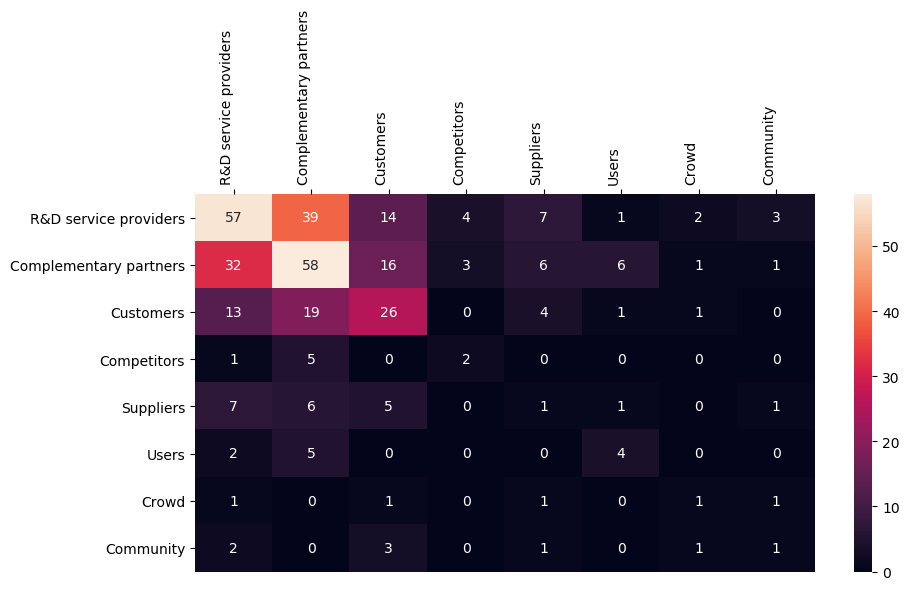

In [25]:
import seaborn as sns
plt.figure(figsize=(10,5))
chart = sns.heatmap(conf_m_df, annot=True)
chart.xaxis.tick_top()
c_plot = plt.xticks(rotation=90, horizontalalignment='right', fontweight='light')

In [26]:
conf_mp_df = (conf_m_df.T /conf_m_df.T.sum()).T
conf_mp_df

,R&D service providers,Complementary partners,Customers,Competitors,Suppliers,Users,Crowd,Community
R&D service providers,0.448819,0.307087,0.110236,0.031496,0.055118,0.007874,0.015748,0.023622
Complementary partners,0.260163,0.471545,0.130081,0.024390,0.048780,0.048780,0.008130,0.008130
Customers,0.203125,0.296875,0.406250,0.000000,0.062500,0.015625,0.015625,0.000000
Competitors,0.125000,0.625000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
Suppliers,0.333333,0.285714,0.238095,0.000000,0.047619,0.047619,0.000000,0.047619
Users,0.181818,0.454545,0.000000,0.000000,0.000000,0.363636,0.000000,0.000000
Crowd,0.200000,0.000000,0.200000,0.000000,0.200000,0.000000,0.200000,0.200000
Community,0.250000,0.000000,0.375000,0.000000,0.125000,0.000000,0.125000,0.125000


In [27]:
conf_mp_df.to_csv('step_one_stochastic_probabilites.csv')

### The Stochastic matrix
#### What are the probabilities of the next move/step of open innovation

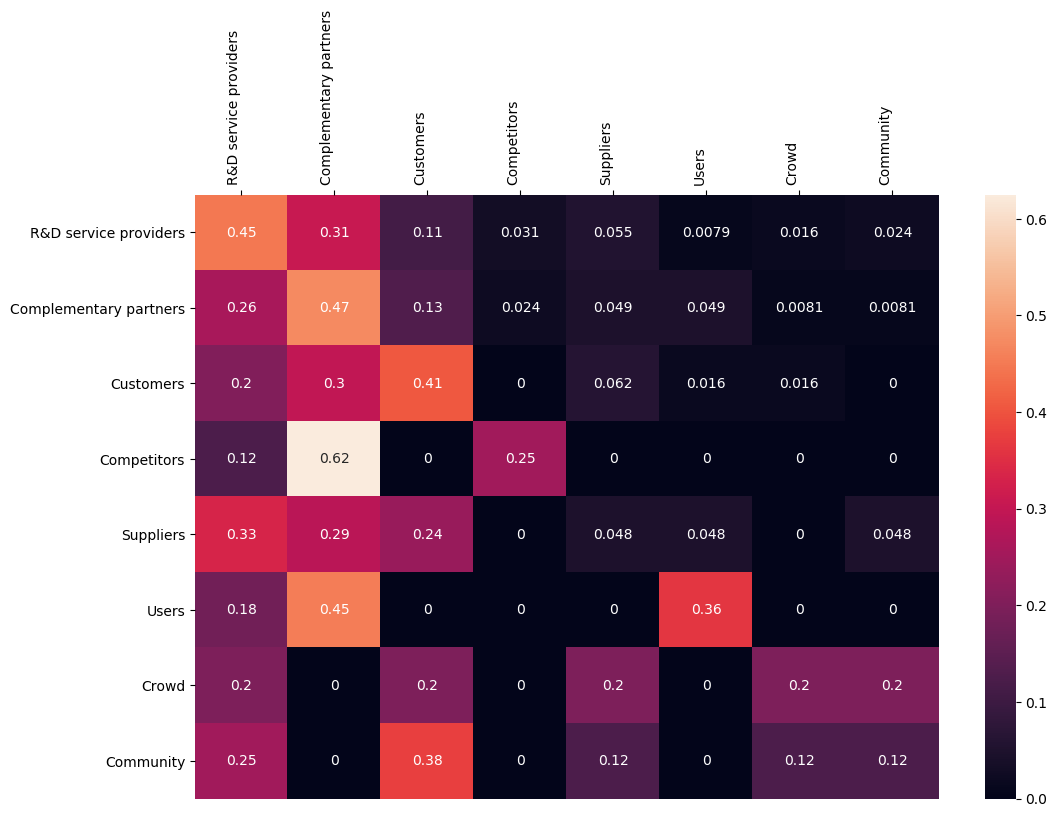

In [28]:
# plt.figure(figsize=(10,5))
chart =sns.heatmap(conf_mp_df, annot=True)
chart.xaxis.tick_top()
c_plot = plt.xticks(rotation=90, horizontalalignment='right', fontweight='light')

In [29]:
from numpy.linalg import matrix_power

### What are the probabilities of the second move.
#### Example : Given my stochastic matrix what is the probability a Customer to become a Competitor in TWO moves? 

#### What are the probabilities of the next move of open innovation (in 2 steps from now)

In [30]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 2),index=labels, columns=labels)

,R&D service providers,Complementary partners,Customers,Competitors,Suppliers,Users,Crowd,Community
R&D service providers,0.336519,0.354370,0.159337,0.029500,0.055335,0.025724,0.017389,0.021826
Complementary partners,0.297704,0.392219,0.159153,0.025793,0.050437,0.047144,0.012606,0.014944
Customers,0.277721,0.347932,0.244055,0.013638,0.057169,0.031087,0.015085,0.013313
Competitors,0.249954,0.489351,0.095080,0.081681,0.037378,0.031472,0.007050,0.008034
Suppliers,0.308737,0.343024,0.199833,0.017467,0.055411,0.039866,0.017245,0.018417
Users,0.265975,0.435462,0.079171,0.016813,0.032194,0.155836,0.006559,0.007990
Crowd,0.287055,0.177935,0.265916,0.006299,0.098047,0.014224,0.071275,0.079248
Community,0.286293,0.223814,0.281540,0.007874,0.083794,0.013780,0.050421,0.052483


In [31]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 2),index=labels, columns=labels).to_csv('step_two_stochastic_probabilites.csv')

#### What are the probabilities of the next move of open innovation (in 3 steps from now)

In [32]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 3),index=labels, columns=labels)

,R&D service providers,Complementary partners,Customers,Competitors,Suppliers,Users,Crowd,Community
R&D service providers,0.311339,0.363685,0.172762,0.026617,0.054634,0.034415,0.016876,0.019671
Complementary partners,0.302849,0.375579,0.168628,0.025391,0.052279,0.043509,0.014753,0.017012
Customers,0.297497,0.360792,0.196643,0.020643,0.054937,0.036999,0.015697,0.016793
Competitors,0.290618,0.411771,0.143158,0.040228,0.047784,0.040549,0.011815,0.014077
Suppliers,0.304355,0.360755,0.183385,0.022457,0.054629,0.039422,0.016524,0.018472
Users,0.293223,0.401062,0.130102,0.023201,0.044694,0.082774,0.011277,0.013667
Crowd,0.299265,0.289415,0.230136,0.014956,0.069951,0.024936,0.034283,0.037057
Community,0.298536,0.312164,0.224766,0.016444,0.064929,0.026572,0.027372,0.029217


In [33]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 3),index=labels, columns=labels).to_csv('step_three_stochastic_probabilites.csv')

#### What are the probabilities of the next move of open innovation (in 4 steps from now)

In [34]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 4),index=labels, columns=labels)

,R&D service providers,Complementary partners,Customers,Competitors,Suppliers,Users,Crowd,Community
R&D service providers,0.305533,0.366279,0.175574,0.025331,0.054135,0.038008,0.016393,0.018747
Complementary partners,0.303603,0.370748,0.172523,0.025047,0.053119,0.041651,0.015535,0.017774
Customers,0.302287,0.365281,0.182130,0.023331,0.054142,0.039085,0.015929,0.017815
Competitors,0.300853,0.383140,0.162777,0.029254,0.051450,0.041632,0.014284,0.016611
Suppliers,0.303813,0.365581,0.178217,0.023999,0.054050,0.039796,0.016205,0.018338
Users,0.300892,0.382683,0.155370,0.024818,0.049949,0.056134,0.013875,0.016279
Crowd,0.302199,0.337362,0.201538,0.020224,0.059816,0.032469,0.022150,0.024242
Community,0.302166,0.346510,0.196717,0.021128,0.057948,0.033845,0.019878,0.021808


In [35]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 4),index=labels, columns=labels).to_csv('step_four_stochastic_probabilites.csv')

### In  ~5 moves the probabilities already converge (remain the same after that...)

In [36]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 5),index=labels, columns=labels)

,R&D service providers,Complementary partners,Customers,Competitors,Suppliers,Users,Crowd,Community
R&D service providers,0.304172,0.367241,0.175852,0.024889,0.053881,0.039415,0.016155,0.018395
Complementary partners,0.303722,0.369038,0.174203,0.024867,0.053460,0.040847,0.015820,0.018044
Customers,0.303409,0.366961,0.177587,0.024263,0.053854,0.039835,0.015989,0.018101
Competitors,0.303157,0.373287,0.170468,0.026134,0.052829,0.041191,0.015329,0.017605
Suppliers,0.303746,0.367125,0.176434,0.024485,0.053824,0.040055,0.016075,0.018256
Users,0.302968,0.374275,0.166841,0.025015,0.052151,0.046255,0.015087,0.017407
Crowd,0.303200,0.356203,0.186835,0.022802,0.056018,0.036640,0.018111,0.020190
Community,0.303263,0.359732,0.184251,0.023250,0.055314,0.037422,0.017351,0.019416


In [37]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 5),index=labels, columns=labels).to_csv('step_five_stochastic_probabilites.csv')

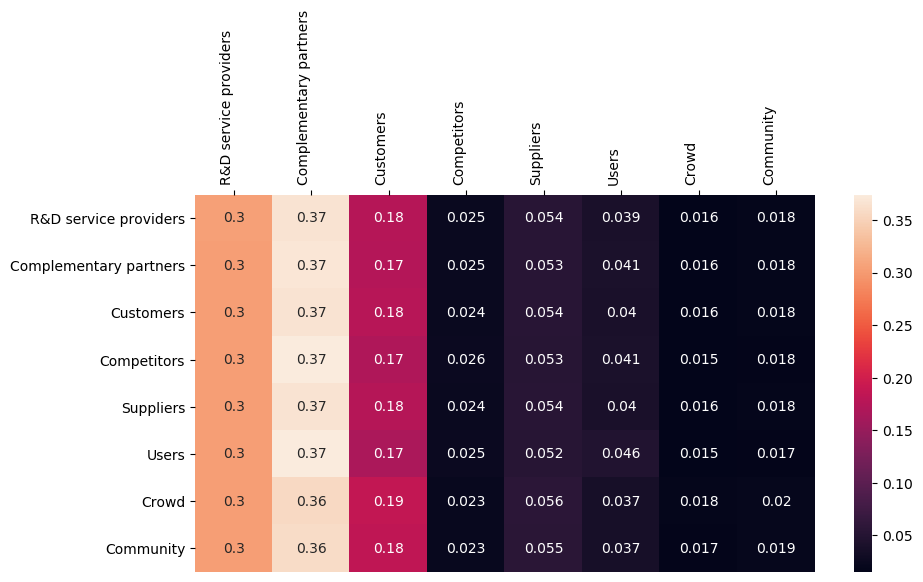

In [38]:
plt.figure(figsize=(10,5))
chart =sns.heatmap(pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 5), index=labels, columns=labels), annot=True)
chart.xaxis.tick_top()
c_plot = plt.xticks(rotation=90, horizontalalignment='right', fontweight='light')

### Surprise : the probalities of convergence are the dataset's distribution of (innovating with) cases

In [39]:
iomoves_thin_path_df['Innovating with'].value_counts(normalize=True)

Complementary partners    0.340081
R&D service providers     0.338057
Customers                 0.176113
Suppliers                 0.054656
Users                     0.036437
Competitors               0.022267
Community                 0.018219
Crowd                     0.014170
Name: Innovating with, dtype: float64

In [40]:
oi_tuples = iomoves_thin_path_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(func=make_pairs,stride=5)
oi_tuples_df = pd.DataFrame(oi_tuples).reset_index().rename({0:'oi_moves'},axis=1)
flat_oi_moves_l = [item for sublist in oi_tuples_df['oi_moves'].values for item in sublist]
flat_oi_moves_df = pd.DataFrame(flat_oi_moves_l).rename({0:'oi_moves_in',1:'oi_moves_out'},axis=1)

In [41]:
conf_m2 = confusion_matrix(flat_oi_moves_df['oi_moves_in'], flat_oi_moves_df['oi_moves_out'],labels=labels)
conf_m2_df = pd.DataFrame(conf_m2, index=labels, columns=labels)
conf_mp2_df = (conf_m2_df.T /conf_m2_df.T.sum()).T
conf_mp2_df

,R&D service providers,Complementary partners,Customers,Competitors,Suppliers,Users,Crowd,Community
R&D service providers,0.407407,0.296296,0.111111,0.0,0.000000,0.111111,0.037037,0.037037
Complementary partners,0.315789,0.368421,0.105263,0.0,0.052632,0.105263,0.000000,0.052632
Customers,0.500000,0.250000,0.083333,0.0,0.083333,0.000000,0.000000,0.083333
Competitors,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Suppliers,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Users,0.333333,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Crowd,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Community,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [42]:
conf_mp2_df.to_csv('data verification in (5) Steps.csv')

In [43]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 3))

,0,1,2,3,4,5,6,7
0,0.311339,0.363685,0.172762,0.026617,0.054634,0.034415,0.016876,0.019671
1,0.302849,0.375579,0.168628,0.025391,0.052279,0.043509,0.014753,0.017012
2,0.297497,0.360792,0.196643,0.020643,0.054937,0.036999,0.015697,0.016793
3,0.290618,0.411771,0.143158,0.040228,0.047784,0.040549,0.011815,0.014077
4,0.304355,0.360755,0.183385,0.022457,0.054629,0.039422,0.016524,0.018472
5,0.293223,0.401062,0.130102,0.023201,0.044694,0.082774,0.011277,0.013667
6,0.299265,0.289415,0.230136,0.014956,0.069951,0.024936,0.034283,0.037057
7,0.298536,0.312164,0.224766,0.016444,0.064929,0.026572,0.027372,0.029217


In [44]:
iomoves_thin_df

,Num of CS,OI Journey number,Innovating with,leading to,No in typology,Management score,Success score,oi_journey_number,oi_case_num
0,1,1.2,R&D service providers,Internal exploitation,1,7.Moderately well managed,8.Very Successful,2,1
1,1,1.3,Complementary partners,Internal exploitation,4,8.Very well managed,8.Very Successful,3,1
2,1,1.4,Customers,Internal exploitation,7,7.Moderately well managed,7.Moderately successful,4,1
3,1,1.5,Customers,Internal exploitation,7,8.Very well managed,7.Moderately successful,5,1
4,1,1.6,Complementary partners,Internal exploitation,4,7.Moderately well managed,7.Moderately successful,6,1
...,...,...,...,...,...,...,...,...,...
495,105,118.5,R&D service providers,Internal exploitation,1,8.Very well managed,8.Very Successful,5,118
496,105,118.6,R&D service providers,Internal exploitation,1,8.Very well managed,8.Very Successful,6,118
497,105,118.7,Suppliers,Internal exploitation,10,9.Extremely well managed,8.Very Successful,7,118
498,105,118.8,Suppliers,Internal exploitation,10,9.Extremely well managed,8.Very Successful,8,118


In [45]:
iomoves_thin_success_df = iomoves_thin_df[['Num of CS','oi_journey_number','Success score']]
iomoves_thin_success_df.loc[:,'oi_journey_number'] = iomoves_thin_success_df.loc[:,'oi_journey_number'].astype(int)

C:\Users\GrigoropoulosS\AppData\Local\Continuum\anaconda3\envs\oimoves\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
iomoves_thin_success_df

,Num of CS,oi_journey_number,Success score
0,1,2,8.Very Successful
1,1,3,8.Very Successful
2,1,4,7.Moderately successful
3,1,5,7.Moderately successful
4,1,6,7.Moderately successful
...,...,...,...
495,105,5,8.Very Successful
496,105,6,8.Very Successful
497,105,7,8.Very Successful
498,105,8,8.Very Successful


In [47]:
iomoves_thin_success_df = iomoves_thin_success_df[iomoves_thin_success_df['Num of CS'].isin(cases_list)]
iomoves_thin_success_df = iomoves_thin_success_df[iomoves_thin_success_df['Success score'] != 'I don\x92t know - Not available']
iomoves_thin_success_df = iomoves_thin_success_df.groupby('Num of CS')[['oi_journey_number','Success score']].apply(reset_io_journey_number).reset_index().drop(columns='level_1')
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '9.Extremely successful','success_level'] = '4'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '8.Very Successful','success_level'] = '4'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '7.Moderately successful','success_level'] = '3'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '6.Slightly successful','success_level'] = '3'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '5.Neither successful, nor unsuccessful','success_level'] = '2'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '4. Slightly unsuccessful','success_level'] = '2'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '3. Moderately unsuccessful','success_level'] = '1'
iomoves_thin_success_df.loc[iomoves_thin_success_df['Success score'] == '2. Very unsuccessful','success_level'] = '1'

In [70]:
iomoves_thin_success_df[iomoves_thin_success_df['success_level'].isna()]

,Num of CS,oi_journey_number,Success score,success_level


In [78]:
oi_tuples = iomoves_thin_success_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(make_pairs,column_name='success_level')
oi_tuples_df = pd.DataFrame(oi_tuples).reset_index().rename({0:'oi_moves'},axis=1)
flat_oi_moves_l = [item for sublist in oi_tuples_df['oi_moves'].values for item in sublist]
flat_oi_moves_df = pd.DataFrame(flat_oi_moves_l).rename({0:'oi_moves_in',1:'oi_moves_out'},axis=1)

In [79]:
labels = iomoves_thin_success_df['success_level'].unique()
conf_m = confusion_matrix(flat_oi_moves_df['oi_moves_in'], flat_oi_moves_df['oi_moves_out'],labels=labels)
conf_m_df = pd.DataFrame(conf_m, index=labels, columns=labels)
conf_mp_df = (conf_m_df.T /conf_m_df.T.sum()).T
conf_mp_df

,4,3,2,1
4,0.705202,0.225434,0.052023,0.017341
3,0.378641,0.553398,0.019417,0.048544
2,0.173913,0.434783,0.391304,0.000000
1,0.300000,0.200000,0.300000,0.200000


In [84]:
pd.DataFrame(matrix_power(conf_mp_df.to_numpy(), 100),index=labels, columns=labels)

,4,3,2,1
4,0.535986,0.357119,0.073607,0.033288
3,0.535986,0.357119,0.073607,0.033288
2,0.535986,0.357119,0.073607,0.033288
1,0.535986,0.357119,0.073607,0.033288


In [80]:
conf_mp_df.to_numpy()

array([[0.70520231, 0.22543353, 0.05202312, 0.01734104],
       [0.37864078, 0.55339806, 0.01941748, 0.04854369],
       [0.17391304, 0.43478261, 0.39130435, 0.        ],
       [0.3       , 0.2       , 0.3       , 0.2       ]])

In [74]:
conf_m

array([[122,  39,   9,   3],
       [ 39,  57,   2,   5],
       [  4,  10,   9,   0],
       [  3,   2,   3,   2]], dtype=int64)

In [59]:
oi_tuples = iomoves_thin_success_df.sort_values(['Num of CS','oi_journey_number']).groupby('Num of CS').apply(func=make_pairs,stride=3,column_name='success_level')
oi_tuples_df = pd.DataFrame(oi_tuples).reset_index().rename({0:'oi_moves'},axis=1)
flat_oi_moves_l = [item for sublist in oi_tuples_df['oi_moves'].values for item in sublist]
flat_oi_moves_df = pd.DataFrame(flat_oi_moves_l).rename({0:'oi_moves_in',1:'oi_moves_out'},axis=1)
conf_m2 = confusion_matrix(flat_oi_moves_df['oi_moves_in'], flat_oi_moves_df['oi_moves_out'],labels=labels)
conf_m2_df = pd.DataFrame(conf_m2, index=labels, columns=labels)
conf_mp2_df = (conf_m2_df.T /conf_m2_df.T.sum()).T
conf_mp2_df

,4,3,2,1
4,0.646341,0.268293,0.036585,0.048780
3,0.380952,0.523810,0.071429,0.023810
2,0.444444,0.333333,0.111111,0.111111
1,0.200000,0.600000,0.200000,0.000000


In [52]:
iomoves_thin_success_df['success_level'].value_counts(normalize=True)

4    0.562780
3    0.322870
2    0.076233
1    0.038117
Name: success_level, dtype: float64

In [72]:
iomoves_thin_success_df['success_level'].value_counts()

4    251
3    144
2     34
1     17
Name: success_level, dtype: int64

In [53]:
conf_mp = conf_mp_df.to_numpy()

In [54]:
conf_mp[2,2] = conf_mp[2,2] - 1

In [55]:
conf_mp

array([[ 0.70520231,  0.22543353,  0.05202312,  0.01734104],
       [ 0.37864078,  0.55339806,  0.01941748,  0.04854369],
       [ 0.17391304,  0.43478261, -0.60869565,  0.        ],
       [ 0.3       ,  0.2       ,  0.3       ,  0.2       ]])

In [56]:
B = np.array([-1, -1, -1])

In [57]:
np.linalg.inv(conf_mp).dot(B)

ValueError: shapes (4,4) and (3,) not aligned: 4 (dim 1) != 3 (dim 0)

In [ ]:
np.linalg.solve(conf_mp,B)

In [ ]:
A = np.array([[-0.44, 0.06], [0.36, -0.5]])
B = np.array([-1, -1])
X = np.linalg.inv(A).dot(B)

print(X)